# Biomedical Data Bases, 2021-2022
### Pandas examples
These are notes by prof. Davide Salomoni (d.salomoni@unibo.it) for the Biomedical Data Base course at the University of Bologna, academic year 2021-2022.

## Read CSV data into a Pandas data frame
Import pandas, then use _read_csv()_ to create the data frame and print its columns.
<br>
Click on Run in Jupyter to execute the cell.

In [1]:
import pandas as pd
df = pd.read_csv('COVID-19-sample-BDB2022.csv')

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
print(df.columns)

Index(['country', 'country_code', 'continent', 'population', 'indicator',
       'weekly_count', 'year_week', 'rate_14_day', 'cumulative_count',
       'source'],
      dtype='object')


In [4]:
# check how many rows and columns we have
shape = df.shape
print(shape)

(41698, 10)


In [5]:
# how many elements are there in total?
# (you could have directly used for that also df.size)
print(shape[0] * shape[1])

416980


## Create a convenience function to map a date to a week number

In [6]:
import datetime
def week_string(year, month, day):
    ''' return a week number in the format yyyy-ww; for example,
    2021-45 for the 45th week of the year 2021. '''
    week = datetime.date(year, month, day).isocalendar()[1]
    return "%s-%02d" % (year, week)

# example: find the week string for March 1, 2020
print(week_string(2020, 3, 1))

# example: find the week string for November 30, 2021
print(week_string(2021, 11, 30))

2020-09
2021-48


## Find cases where 'country' is Italy from March 2020 to November 2021

In [7]:
# we import the time module so we can use time.time()
# to find out how long it takes to come to the result
import time

# convert the start and end date to the corresponding week numbers
start_week = week_string(2020, 3, 1)
end_week = week_string(2021, 11, 30)

### First attempt: the "brute-force" way, using iterrows()

In [8]:
start_time = time.time()

# create a dictionary with key = week string, and value = number of cases in that week
it_cases = dict()
for index,row in df.iterrows():
    country = row['country']
    if country == 'Italy':
        indicator = row['indicator']
        if indicator != 'cases':
            continue
        week = row['year_week']
        if (week >= start_week) and (week <= end_week):
            cases = row['weekly_count']
            it_cases[week] = cases

# create a new dataframe out of the it_cases dictionary. It will contain
# only cases occurred in Italy between March 2020 and November 2021.
df2 = pd.DataFrame(list(it_cases.items()), columns=['week', 'cases'])

end_time = time.time()

print('The brute-force method took %.2f seconds' % (end_time-start_time))

The brute-force method took 1.76 seconds


<AxesSubplot:>

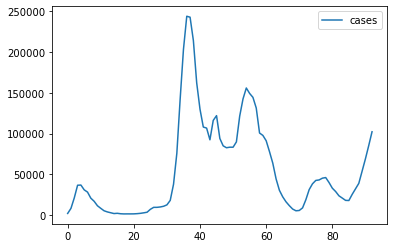

In [9]:
# plot the cases
df2.plot()

### Second attempt: the "pandas-native" way, using df.query()

In [10]:
start_time = time.time()

# create a new dataframe using df.query(). It will contain
# only cases occurred in Italy between March 2020 and November 2021.
df3 = df.query('country=="Italy" and indicator=="cases" and year_week>="%s" and year_week<="%s"' % (start_week, end_week))

end_time = time.time()

print('The Pandas-native method took %.2f seconds' % (end_time-start_time))

The Pandas-native method took 0.03 seconds


<AxesSubplot:>

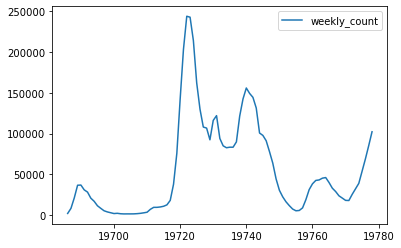

In [11]:
# plot the cases (select the "weekly_count" column only)
df3.plot(y='weekly_count')

## Reading an Excel file

### Remember that you need to have the openpyxl library installed

In [12]:
! pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


<AxesSubplot:>

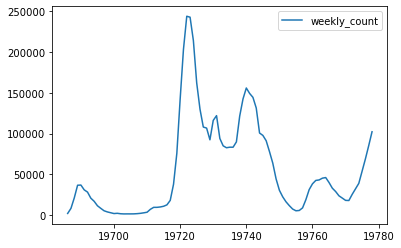

In [13]:
# create a dataframe from the excel file
df = pd.read_excel('COVID-19-sample-BDB2022.xlsx')
df3 = df.query('country=="Italy" and indicator=="cases" and year_week>="%s" and year_week<="%s"' % (start_week, end_week))
df3.plot(y='weekly_count')

In [14]:
# Note that reading from an excel file is FAR slower than reading from a CSV file:

start_time = time.time()
df_csv = pd.read_csv('COVID-19-sample-BDB2022.csv')
end_time = time.time()
print('Reading the CVS file took %.2f seconds' % (end_time-start_time))

start_time = time.time()
df_excel = pd.read_excel('COVID-19-sample-BDB2022.xlsx')
end_time = time.time()
print('Reading the excel file took %.2f seconds' % (end_time-start_time))

Reading the CVS file took 0.08 seconds
Reading the excel file took 67.60 seconds


## Examples of a few common pandas functions

### sum()
Compute the sum of all the deaths that are recorded in the COVID-19 DataFrame for Italy.
1. Create a new dataframe containing only the records where the country is Italy and the indicator is deaths.
2. Call sum() for the weekly_count column on that dataframe.
3. Verify that you obtained the right number, checking that it is equal to cumulative_count as reported in the last row of the dataframe.

In [15]:
df_italy = df.query('country=="Italy" and indicator=="deaths"')
df_italy['weekly_count'].sum()

135405

In [16]:
df_italy.tail(1)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
19881,Italy,ITA,Europe,59641488,deaths,452,2021-49,16.230313,135405,TESSy COVID-19


### describe()
Generate simple statistics of the df_italy dataframe.

In [17]:
df_italy.describe()

,population,weekly_count,rate_14_day,cumulative_count
count,102.0,102.000000,101.000000,102.000000
mean,59641488.0,1327.500000,44.881709,74391.186275
std,0.0,1593.087243,52.955588,48743.002666
min,59641488.0,0.000000,0.000000,0.000000
25%,59641488.0,132.250000,4.711485,35343.500000
50%,59641488.0,412.500000,13.363181,74457.500000
75%,59641488.0,2397.250000,79.223376,128449.000000
max,59641488.0,5991.000000,182.171847,135405.000000


### nunique()
How many countries are recorded in the COVID-19 dataframe?

In [18]:
df.nunique()

country               224
country_code          218
continent               5
population            257
indicator               2
weekly_count         8894
year_week             102
rate_14_day         27839
cumulative_count    20083
source                  3
dtype: int64

### groupby()
Group the COVID-19 dataframe by continent, compute the sum of the columns (although logically summing some of the columns does not make sense, think about that). Then plot weekly_count.

In [19]:
df_grouped = df.groupby('continent')
# by itself, groupby just returns a special type of dataframe, to which you should apply some function.
# check the type of the returned dataframe:
type(df_grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
# now sum the 'grouped' dataframe
df_grouped.sum()

,population,weekly_count,rate_14_day,cumulative_count
continent,,,,
Africa,505057260196,18415112,2.153251e+05,694025932
America,405718349336,202698788,8.321967e+05,8345036558
Asia,1818877754824,146719320,4.132303e+05,5246170472
Europe,433852343596,233376368,1.622570e+06,8058072309
Oceania,16569714824,834028,1.077630e+05,17120842


<AxesSubplot:title={'center':'COVID-19 cases grouped by continent'}, xlabel='continent', ylabel='Total cases'>

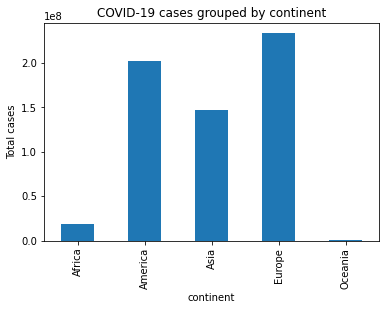

In [28]:
# plot weekly_count
# use a bar plot, set the y-axis label and the title
df_grouped.sum()['weekly_count'].plot(kind='bar', ylabel='Total cases', title='COVID-19 cases grouped by continent')

Now check which countries are part of the group 'Oceania', using get_group()

In [22]:
df_grouped.get_group('Oceania')

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
1002,American Samoa,ASM,Oceania,55197,cases,1,2021-37,NaN,1,Epidemic intelligence national data
1003,American Samoa,ASM,Oceania,55197,cases,0,2021-38,1.811693,1,Epidemic intelligence national data
1004,American Samoa,ASM,Oceania,55197,cases,0,2021-39,0.000000,1,Epidemic intelligence national data
1005,American Samoa,ASM,Oceania,55197,cases,2,2021-40,3.623385,3,Epidemic intelligence national data
1006,American Samoa,ASM,Oceania,55197,cases,0,2021-41,3.623385,3,Epidemic intelligence national data
...,...,...,...,...,...,...,...,...,...,...
40981,Wallis And Futuna,WLF,Oceania,11246,deaths,0,2021-45,0.000000,7,Epidemic intelligence national data
40982,Wallis And Futuna,WLF,Oceania,11246,deaths,0,2021-46,0.000000,7,Epidemic intelligence national data
40983,Wallis And Futuna,WLF,Oceania,11246,deaths,0,2021-47,0.000000,7,Epidemic intelligence national data
40984,Wallis And Futuna,WLF,Oceania,11246,deaths,0,2021-48,0.000000,7,Epidemic intelligence national data


How many unique countries are there? Use nunique() on the 'country' column to find out.

In [23]:
df_grouped.get_group('Oceania')['country'].nunique()

18

Which countries are in the Oceania group? Use unique() (without the 'n') on the 'country' column to find out.

In [24]:
df_grouped.get_group('Oceania')['country'].unique()

array(['American Samoa', 'Australia', 'Fiji', 'French Polynesia', 'Guam',
       'Marshall Islands', 'Micronesia (Federated States Of)',
       'New Caledonia', 'New Zealand', 'Northern Mariana Islands',
       'Oceania (total)', 'Palau', 'Papua New Guinea', 'Samoa',
       'Solomon Islands', 'Tonga', 'Vanuatu', 'Wallis And Futuna'],
      dtype=object)

In [25]:
# of course in the array above there is exactly the number of countries reported by nunique():
print(len(df_grouped.get_group('Oceania')['country'].unique()))

18


## Exporting to Excel

In [26]:
# export all Italian data to a new Excel file using the to_excel() method
df_italy = pd.read_excel('COVID-19-sample-BDB2022.xlsx').query('country == "Italy"')
df_italy.to_excel('COVID-19-italy-only.xlsx')

## Reading a CSV file from a remote location

In [27]:
df = pd.read_csv('https://github.com/dsalomoni/bdb-2022/raw/main/covid/COVID-19-sample-BDB2022.csv')
df_deaths_italy = df.query('country == "Italy" and indicator == "deaths"')
df_deaths_italy['weekly_count'].sum()

135405